## Importing Libraries 

In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Dataset Information
Features:
- gender: Male or Female
- age: age of the patient (years)
- hypertension: 0 (doesn't suffer hypertension) or 1 (suffers from hypertension)
- heart_disease: 0 (doesn't suffer from heart disease) or 1 (suffers from heart disease)
- ever_married: yes or no
- work_type: Children, Govt_job, Never_worked, Private, or Self-employed
- Residence_type: urban or rural
- avg_glucose_level: average glucose level in blood
- bmiL
- smoking_status: formerly smoke, never smoked, smokes, or unknown
- stroke: 0 (patient never had a stroke) or 1 (patient had a stroke)

In [258]:
stroke_data = pd.read_csv('/Users/sahitisomalraju/Downloads/healthcare-dataset-stroke-data.csv')
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [259]:
#Shape of dataset
stroke_data.shape

(5110, 12)

In [260]:
#Column names
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [261]:
#Dataset information
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [262]:
# Dataset Summary
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [263]:
# Number of Null Values in dataset
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [264]:
# To see number of occurrences of 'Unknown' in smoking status column
stroke_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

## Data Preprocessing 

In [265]:
#Drop N/A or null values
stroke_data = stroke_data.dropna()

In [266]:
stroke_data = stroke_data.drop(stroke_data[(stroke_data['gender']=='Other')].index)
stroke_data = stroke_data.drop(stroke_data[(stroke_data['smoking_status']=='Unknown')].index)

In [267]:
#Change data type of age from float > int
stroke_data['age'] = stroke_data['age'].astype(int)

In [268]:
stroke_data['stroke'].replace({0:'No', 1:'Yes'}, inplace=True)
stroke_data['heart_disease'].replace({0:'No', 1:'Yes'}, inplace=True)
stroke_data['hypertension'].replace({0:'No', 1:'Yes'}, inplace=True)

In [269]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,31112,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,56669,Male,81,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,Male,82,Yes,No,Yes,Self-employed,Rural,71.97,28.3,never smoked,No
5102,45010,Female,57,No,No,Yes,Private,Rural,77.93,21.7,never smoked,No
5106,44873,Female,81,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,19723,Female,35,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No


In [270]:
#Shape of dataset after dropping null values
stroke_data.shape

(3425, 12)

In [271]:
#Summary of dataset after dropping null values
stroke_data.describe()

,id,age,avg_glucose_level,bmi
count,3425.000000,3425.000000,3425.000000,3425.000000
mean,37333.512117,48.652555,108.311670,30.292350
std,21050.593185,18.850018,47.706754,7.295778
min,84.000000,10.000000,55.120000,11.500000
25%,18986.000000,34.000000,77.230000,25.300000
50%,38067.000000,50.000000,92.350000,29.100000
75%,55459.000000,63.000000,116.200000,34.100000
max,72915.000000,82.000000,271.740000,92.000000


In [282]:
#Dataset information after preprocessing
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3425 non-null   int64  
 1   gender             3425 non-null   object 
 2   age                3425 non-null   int64  
 3   hypertension       3425 non-null   object 
 4   heart_disease      3425 non-null   object 
 5   ever_married       3425 non-null   object 
 6   work_type          3425 non-null   object 
 7   Residence_type     3425 non-null   object 
 8   avg_glucose_level  3425 non-null   float64
 9   bmi                3425 non-null   float64
 10  smoking_status     3425 non-null   object 
 11  stroke             3425 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 347.9+ KB


## Data Visualization 

In [272]:
stroke_patients = stroke_data[stroke_data['stroke']=='Yes']
non_stroke_patients = stroke_data[stroke_data['stroke']=='No']

### 1. Percentage of Patients with Stroke 

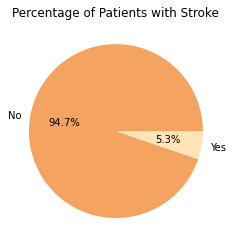

In [283]:
count = stroke_data.groupby('stroke').count()['id']
labels = count.index
colors2 = ['sandybrown', 'moccasin']

plt.pie(count, labels=labels, autopct='%1.1f%%', colors=colors2)
plt.title('Percentage of Patients with Stroke')
plt.savefig('/Users/sahitisomalraju/Documents/INFO-B 473/fig1')
plt.show()

### 2. Stroke Patient's Gender Distribution

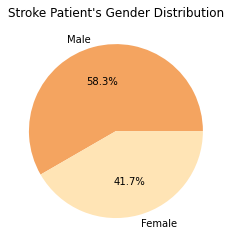

In [284]:
gender = stroke_patients['gender']
labels = ['Male','Female']
counts = gender.value_counts()
colors1 = ['steelblue','indianred']

plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors2)
plt.title("Stroke Patient's Gender Distribution")
plt.savefig('/Users/sahitisomalraju/Documents/INFO-B 473/fig2')
plt.show()

### 3. Stroke Patient's Age Distribution

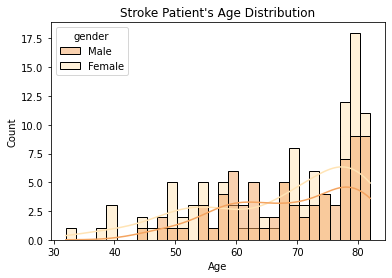

In [285]:
graph_age = sns.histplot(data=stroke_patients, x='age', bins=30, hue='gender', palette=colors2, kde=True)
graph_age.set_title("Stroke Patient's Age Distribution")
graph_age.set_xlabel('Age')
plt.savefig('/Users/sahitisomalraju/Documents/INFO-B 473/fig4')
plt.show()


### 4. Distribution of Hypertension 

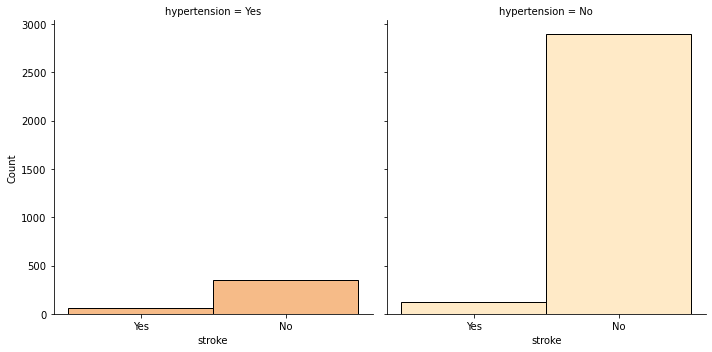

In [286]:
graph_hypertension = sns.FacetGrid(stroke_data, col='hypertension', height=5, aspect=1, hue='hypertension', palette=['moccasin','sandybrown'], col_order=['Yes', 'No'])
graph_hypertension.map(sns.histplot, 'stroke')
plt.savefig('/Users/sahitisomalraju/Documents/INFO-B 473/fig6')
plt.show()

### 5. Distribution of Heart Disease 

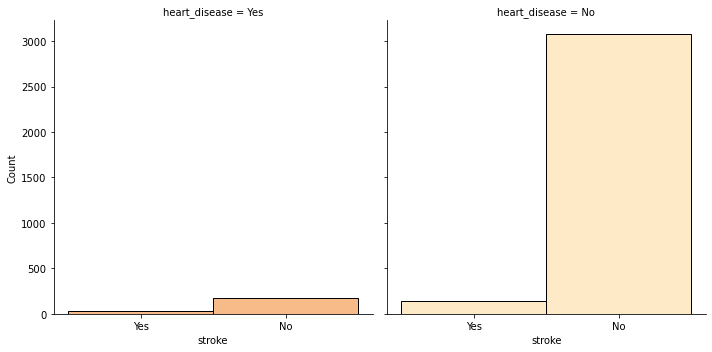

In [287]:
graph_bmi = sns.FacetGrid(stroke_data, col='heart_disease', height=5, aspect=1, hue='heart_disease', palette=colors2)
graph_bmi.map(sns.histplot, 'stroke')
plt.savefig('/Users/sahitisomalraju/Documents/INFO-B 473/fig5')
plt.show()

In [143]:
heart_disease = stroke_data[stroke_data['heart_disease']==1]
non_heart_disease = stroke_data[stroke_data['heart_disease']==0]

### 6. Distribution of Patient's Work Status 

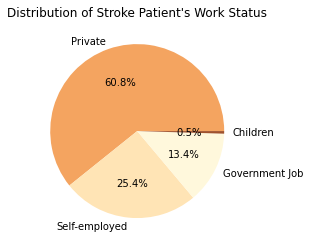

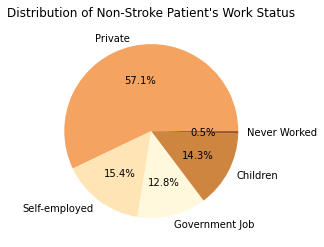

In [144]:
stroke_work_type = stroke_patients['work_type']
non_stroke_work_type = non_stroke_patients['work_type']
labels = stroke_work_type.unique()
stroke_labels = ['Private', 'Self-employed', 'Government Job', 'Children']
non_stroke_labels = ['Private', 'Self-employed', 'Government Job', 'Children', 'Never Worked']
stroke_counts = pd.Series(data=[127, 53,28,1], index=stroke_labels)
non_stroke_counts = pd.Series(data=[2683,722,602,670,22], index=non_stroke_labels)

plt.pie(stroke_counts, labels=stroke_labels, autopct='%1.1f%%', colors=['sandybrown', 'moccasin', 'cornsilk', 'sienna'])
plt.title("Distribution of Stroke Patient's Work Status")
plt.show()

plt.pie(non_stroke_counts, labels=non_stroke_labels, autopct='%1.1f%%', colors=['sandybrown', 'moccasin', 'cornsilk', 'peru', 'sienna'])
plt.title("Distribution of Non-Stroke Patient's Work Status")
plt.show()

### 7. BMI Distribution

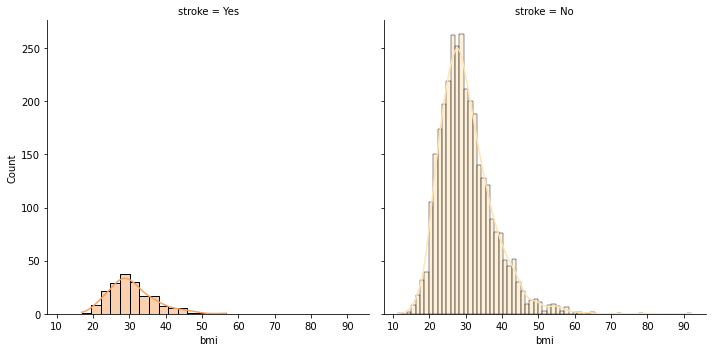

In [289]:
graph_bmi = sns.FacetGrid(stroke_data, col='stroke', height=5, aspect=1, hue='stroke', palette=colors2)
graph_bmi.map(sns.histplot, 'bmi', kde=True)
plt.savefig('/Users/sahitisomalraju/Documents/INFO-B 473/fig8')
plt.show()


Text(0.5, 0, 'Body Mass Index')

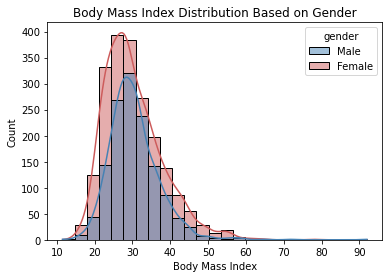

In [146]:
graph_bmi2 = sns.histplot(data=stroke_data, x='bmi', bins=25, hue='gender', palette=colors1, kde=True)
graph_bmi2.set_title('Body Mass Index Distribution Based on Gender')
graph_bmi2.set_xlabel('Body Mass Index')

### 8. Average Glucose Level Distribution 

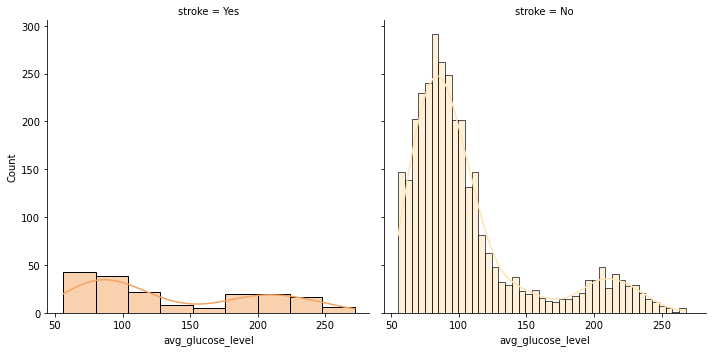

In [288]:
graph_bmi = sns.FacetGrid(stroke_data, col='stroke', height=5, aspect=1, hue='stroke', palette=colors2)
graph_bmi.map(sns.histplot, 'avg_glucose_level', kde=True)
plt.savefig('/Users/sahitisomalraju/Documents/INFO-B 473/fig7')
plt.show()


### 9. Smoking Status 

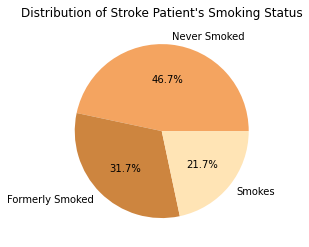

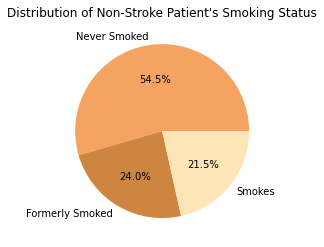

In [148]:
stroke_smoke_status = stroke_patients['smoking_status']
non_stroke_smoke_status = non_stroke_patients['smoking_status']
#labels = stroke_smoke_status.unique()
labels = ['Never Smoked', 'Formerly Smoked', 'Smokes']
stroke_counts = stroke_smoke_status.value_counts()
non_stroke_counts = pd.Series(data=[1768, 779, 698], index=labels)
 
colors3 = ['sandybrown', 'peru', 'moccasin']

plt.pie(stroke_counts, labels=labels, autopct='%1.1f%%', colors=colors3)
plt.title("Distribution of Stroke Patient's Smoking Status")
plt.show()

plt.pie(non_stroke_counts, labels=labels, autopct='%1.1f%%', colors=colors3)
plt.title("Distribution of Non-Stroke Patient's Smoking Status")
plt.show()

### Correlation Matrix 

In [149]:
stroke_data_temp = stroke_data

In [236]:
stroke_data_temp = stroke_data_temp.drop(['id'], axis=1)
stroke_data_temp['stroke'].replace({'No':0, 'Yes':1}, inplace=True)
stroke_data_temp['heart_disease'].replace({'No':0, 'Yes':1}, inplace=True)
stroke_data_temp['ever_married'].replace({'No':0, 'Yes':1}, inplace=True)
stroke_data_temp['smoking_status'].replace({'formerly smoked':1, 'smokes':1, 'never smoked':0}, inplace=True)
stroke_data_temp['gender'].replace({'Male':0, 'Female':1}, inplace=True)
stroke_data_temp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,Private,Urban,228.69,36.6,1,1
2,0,80,0,1,1,Private,Rural,105.92,32.5,0,1
3,1,49,0,0,1,Private,Urban,171.23,34.4,1,1
4,1,79,1,0,1,Self-employed,Rural,174.12,24.0,0,1
5,0,81,0,0,1,Private,Urban,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,0,82,1,0,1,Self-employed,Rural,71.97,28.3,0,0
5102,1,57,0,0,1,Private,Rural,77.93,21.7,0,0
5106,1,81,0,0,1,Self-employed,Urban,125.20,40.0,0,0
5107,1,35,0,0,1,Self-employed,Rural,82.99,30.6,0,0


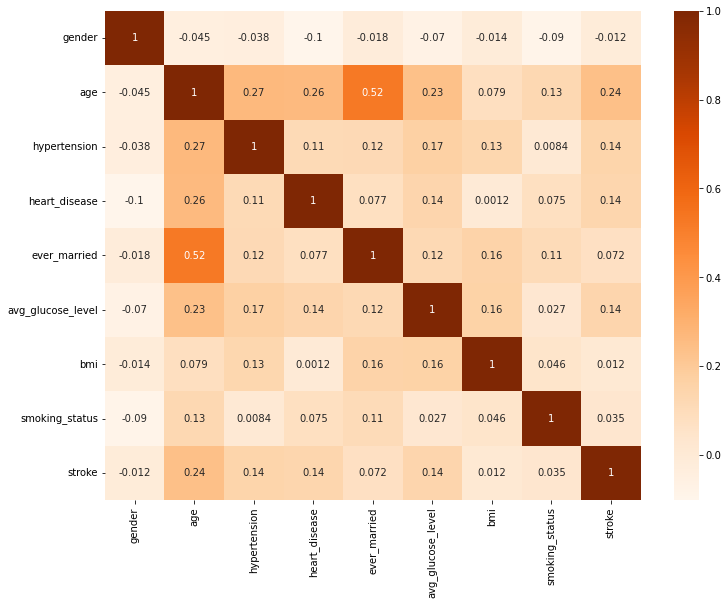

In [238]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(stroke_data_temp.corr(), annot=True, cmap='Oranges', ax=ax)
plt.show()

## Machine Learning: Decision Tree

### Identifying Features and Target 

In [152]:
features = pd.DataFrame()
features.insert(0, 'age', stroke_data_temp['age'])
features.insert(1, 'hypertension', stroke_data_temp['hypertension'])
features.insert(2, 'avg_glucose_level', stroke_data_temp['avg_glucose_level'])
features.insert(3, 'heart_disease', stroke_data_temp['heart_disease'])
features

,age,hypertension,avg_glucose_level,heart_disease
0,67,0,228.69,1
2,80,0,105.92,1
3,49,0,171.23,0
4,79,1,174.12,0
5,81,0,186.21,0
...,...,...,...,...
5100,82,1,71.97,0
5102,57,0,77.93,0
5106,81,0,125.20,0
5107,35,0,82.99,0


In [153]:
print(features.shape)
target = stroke_data.iloc[:,11]
print(target.shape)

(3425, 4)
(3425,)


### Train Test Split Data 

In [154]:
#Split data : 70% for training, 30% for testing
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

X_train: (2397, 4)
Y_train: (2397,)
X_test: (1028, 4)
Y_test: (1028,)


### Fit the Model 

In [155]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

### Before Pruning 

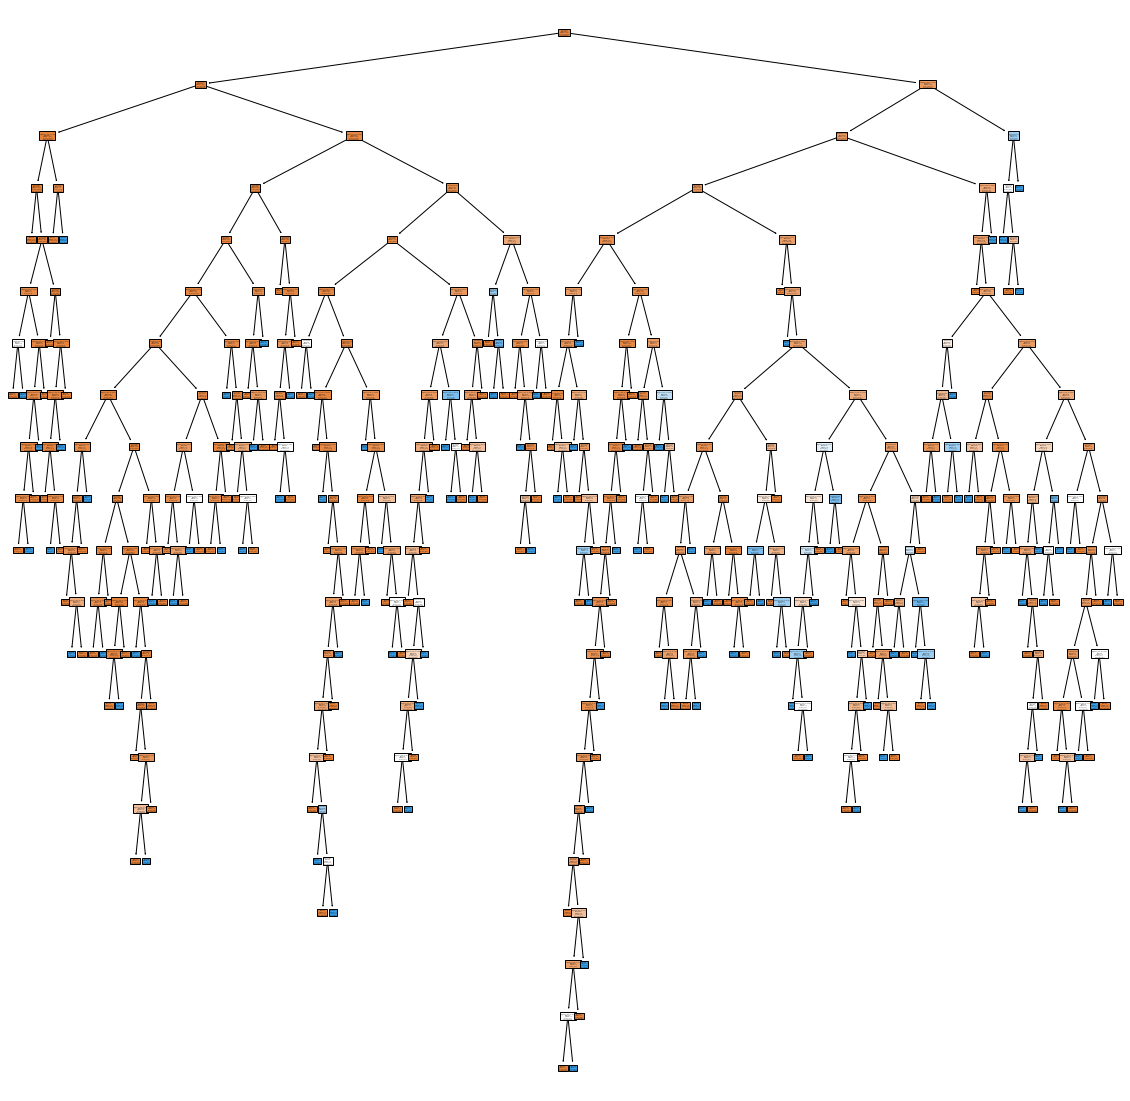

In [156]:
plt.figure(figsize=(20,20))
features_labels = features.columns
classes = ['No Stroke', 'Stroke']
tree.plot_tree(clf, feature_names=features_labels, class_names=classes, filled=True)
plt.show()

### Post Pruning

In [157]:
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00020553 0.00026177 0.00026488 0.00026743 0.00026782
 0.00026885 0.00027813 0.0003013  0.00030196 0.00030973 0.00031289
 0.00031289 0.00031289 0.00031786 0.0003185  0.00031947 0.00032346
 0.00032793 0.00032963 0.00033375 0.00033375 0.00033375 0.00034491
 0.00035301 0.00036504 0.00037547 0.00037547 0.00037721 0.00037926
 0.00038993 0.00039464 0.00039523 0.00039823 0.0004028  0.00040437
 0.00040773 0.00041077 0.0004132  0.00041415 0.00042328 0.00042361
 0.00042844 0.00046354 0.00050063 0.0005123  0.00051774 0.00055625
 0.00055625 0.00055625 0.00055625 0.0005593  0.00059333 0.00059797
 0.00059824 0.00059897 0.00064866 0.00068348 0.00071425 0.00075713
 0.00127527 0.00643548]


In [158]:
# For each alpha, append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

### Plot Train and Test Score 

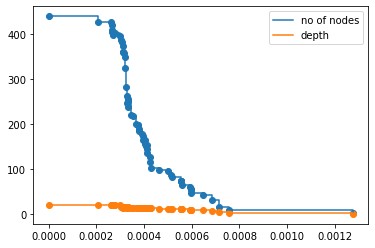

In [159]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.scatter(ccp_alphas, node_counts)
plt.scatter(ccp_alphas, depth)
plt.plot(ccp_alphas, node_counts, label='no of nodes', drawstyle='steps-post')
plt.plot(ccp_alphas, depth, label='depth', drawstyle='steps-post')

plt.legend()
plt.show()

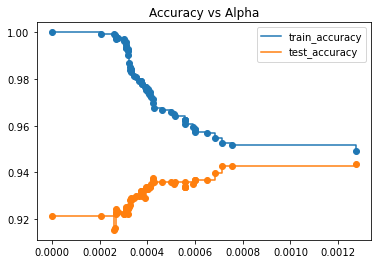

In [160]:
train_acc = []
test_acc = []

for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred, Y_train))
    test_acc.append(accuracy_score(y_test_pred, Y_test))
    
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle='steps-post')
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle='steps-post')

plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

In [166]:
clf_ = tree.DecisionTreeClassifier(ccp_alpha=0.0008)
clf_.fit(X_train, Y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score: {accuracy_score(y_train_pred, Y_train)}')
print(f'Test score: {accuracy_score(y_test_pred, Y_test)}')

Train score: 0.9516061743846475
Test score: 0.9426070038910506


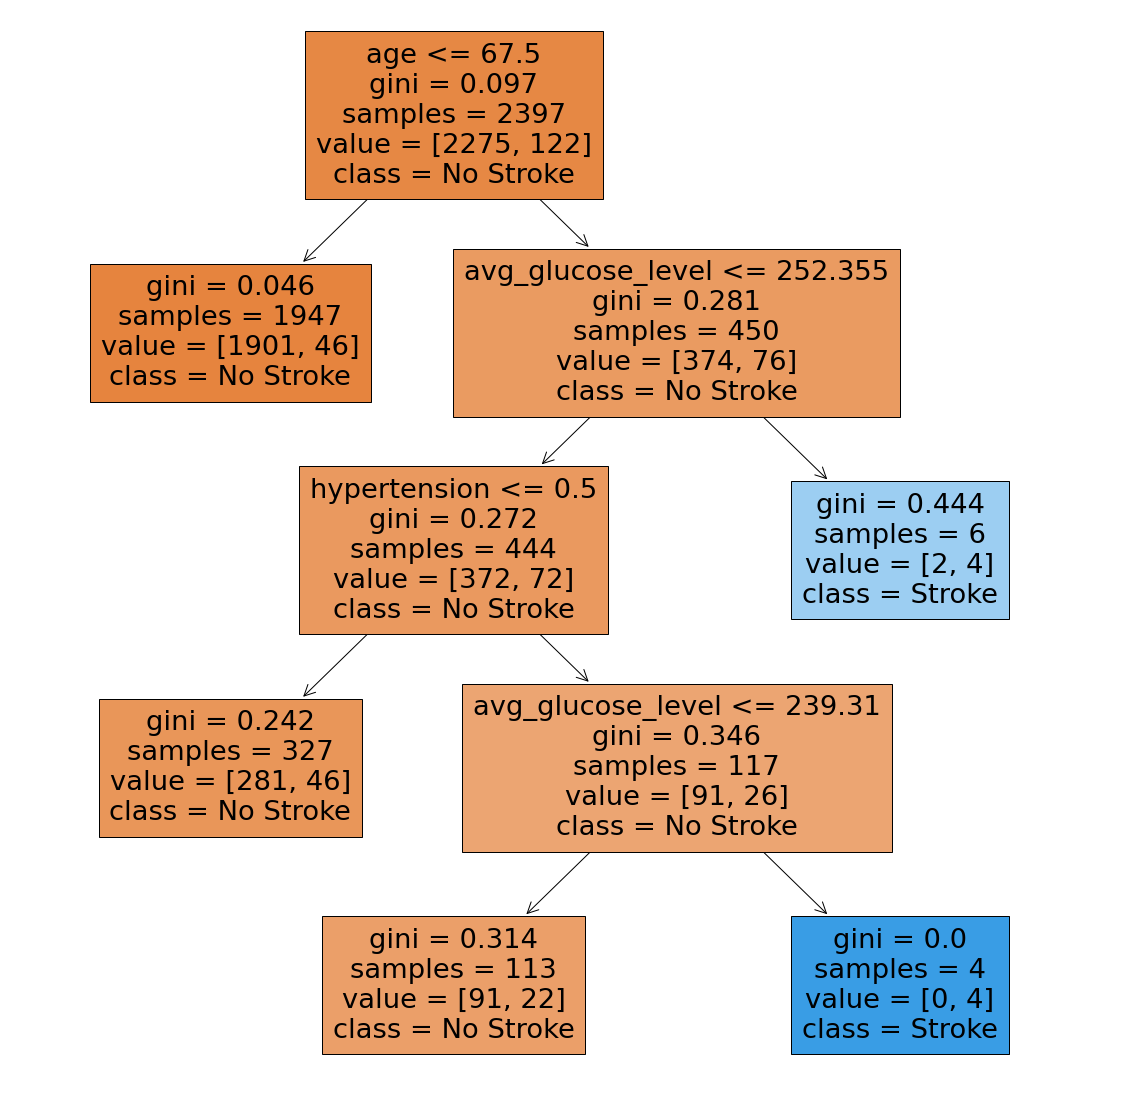

In [162]:
plt.figure(figsize=(20,20))
features_labels = features.columns
classes = ['No Stroke', 'Stroke']
tree.plot_tree(clf_, feature_names=features_labels, class_names=classes, filled=True)
plt.show()

### Testing Performance of Model 

In [163]:
#Accuracy Score
clf_accuracy = accuracy_score(Y_test, y_test_pred)
print('Accuracy Score:', clf_accuracy)

Accuracy Score: 0.9426070038910506


In [280]:
#Confusion Matrix
gnb_conf_matrix = confusion_matrix(Y_test, y_test_pred)
print('Confusion Matrix\n', gnb_conf_matrix)

Confusion Matrix
 [[968   2]
 [ 57   1]]


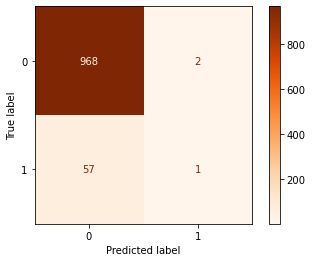

In [281]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_test_pred, cmap='Oranges')